In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

In [32]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [33]:
# For Implementing KNN
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# For ROC Curve
from sklearn.metrics import roc_curve

In [35]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
data = pd.read_excel("StateCode.xlsx")

In [38]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
0,95,SO,32,10.0,17.0,1,132,NaN,NaN
1,106,SO,43,6.0,25.0,1,132,NaN,NaN
2,118,LF1,26,10.0,43.0,3,132,NaN,NaN
3,122,LF1,39,7.0,43.0,3,148,NaN,NaN
4,120,SO,41,12.0,46.0,3,148,NaN,NaN


In [39]:
data['code'].value_counts()

SO      36264
LF1     16195
PO       6319
LP       2189
PM       1172
LA        597
R         548
FP        530
FO        509
FA        248
FQ        233
LD        166
LQ        161
LG3       155
LG5        80
RLP        58
FG1        52
PA         22
RLF1       20
LG          6
FG          5
LG1         3
LF2         1
LF0         1
O           1
Name: code, dtype: int64

In [40]:
data.isnull().sum()

mw                0
code              0
temp              0
moisture          0
mvar              0
unit_no           0
mw_declare        0
Unnamed: 7    65535
Unnamed: 8    65535
dtype: int64

In [41]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]
y

0         SO
1         SO
2        LF1
3        LF1
4         SO
        ... 
65530     SO
65531     SO
65532     SO
65533     FP
65534    LF1
Name: code, Length: 65535, dtype: object

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,mw,temp,moisture,mvar,mw_declare,unit_no
0,-0.091759,0.709156,-0.819521,0.563184,0.485975,-1.544303
1,0.150170,1.738607,-0.977919,0.943616,0.485975,-1.544303
2,0.414092,0.147638,-0.819521,1.799589,0.485975,-0.771187
3,0.502066,1.364262,-0.938320,1.799589,1.505249,-0.771187
4,0.458079,1.551435,-0.740321,1.942251,1.505249,-0.771187
...,...,...,...,...,...,...
65530,0.040202,-0.320295,-0.027528,-0.340342,0.103747,-1.544303
65531,0.062196,-0.413881,-0.265126,-0.530558,0.103747,-1.544303
65532,0.128177,0.709156,-0.700722,-0.102572,0.103747,-1.544303
65533,-2.181143,1.177089,-0.938320,-0.245234,1.123021,-1.157745


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=7)

In [45]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
Model.score(X_test,y_test) # Accuracy of the model

0.8389196887238696

In [48]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [49]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

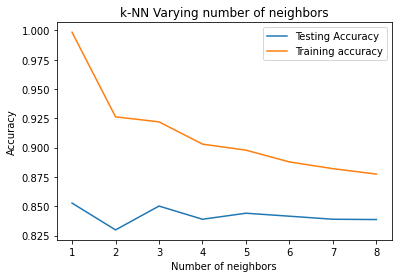

In [50]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [51]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=5)

In [52]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
Model.score(X_test,y_test) # Accuracy of the model

0.8440567621178984